## This notebook can be used to inspect the meta file of a dataset

It should be run using the environment created from the requirements.txt file in the SVGRepresentation folder.

The following code expects the folder 'SVG_Data' to be in the same directory as the cloned project repository.

```
parent
    ├── SVG_Data
    └── SVG_LogoGenerator
```

If this is not the case on your machine make sure to
* set the correct path to the SVG_Data folder in the first cell of this notebook.

In [3]:
datafolder = "../../../SVG_Data/"

### Helpers:

In [2]:
from IPython.display import display
from cairosvg import svg2png
import io
from PIL import Image
import os
import pandas as pd

In [4]:
svgs_folder = os.path.join(datafolder, "SVGs_transforms_removed/WorldVector_no_transforms_filtered")

In [5]:
def names_to_paths(names_list, folder_path = svgs_folder):
    return [os.path.join(folder_path, str(name) + ".svg") for name in names_list]


def show_svgs(svg_file_paths, limit = 5, print_file_path=False):
    for file_path in svg_file_paths[:limit]:
        try:
            img_bytes = svg2png(url=file_path, output_width=200)
            img = Image.open(io.BytesIO(img_bytes))
            if print_file_path:
                print(file_path)
            display(img)
        except:
            pass


def filter_by_size(svg_file_paths, max_size_kb=1):
    return list(filter(lambda path: os.stat(path).st_size <= max_size_kb * 1024, svg_file_paths))

def filter_by_nbgroups_maxlengroup_and_nbcommands(meta_df, number_groups=16, max_len_groups = 62, number_commands = 128, folder_path = svgs_folder):
    filtered_ids = meta_df[(meta_df.nb_groups > 0) & (meta_df.nb_groups <= number_groups) & (meta_df.max_len_group <= max_len_groups) & (meta_df.total_len <= number_commands)].id
    return names_to_paths(filtered_ids, folder_path = folder_path)

### Worldlogo Analysis

In [6]:
worldlogo_classified = pd.read_csv(os.path.join(datafolder, "raw/Worldvector/WorldlogoLabelComplete.csv"))
worldlogo_meta = pd.read_csv(os.path.join(datafolder, "data_for_training_deepsvg_model/WorldVector_meta/meta_60436.csv"))
worldlogo = pd.merge(worldlogo_meta, worldlogo_classified, left_on ="id", right_on="Company")
worldlogo

,id,total_len,nb_groups,len_groups,max_len_group,Company,Filename,Pictogram,Text,Face,TextArea,category
0,038-sign,198,21,"[13, 9, 8, 10, 13, 9, 7, 8, 12, 19, 5, 9, 6, 4...",19,038-sign,038-sign.png,False,False,False,0.000000,Abstract mark
1,048-sign,92,10,"[13, 11, 8, 9, 9, 5, 10, 9, 11, 7]",13,048-sign,048-sign.png,False,False,False,0.000000,Abstract mark
2,014-sign,81,8,"[13, 13, 11, 10, 7, 10, 10, 7]",13,014-sign,014-sign.png,False,False,False,0.000000,Abstract mark
3,055-sign,97,10,"[13, 17, 17, 8, 8, 8, 6, 5, 8, 7]",17,055-sign,055-sign.png,False,True,False,0.092383,Combination mark
4,069-sign,195,25,"[13, 10, 10, 10, 6, 6, 6, 4, 5, 5, 5, 5, 26, 1...",26,069-sign,069-sign.png,False,False,False,0.000000,Abstract mark
...,...,...,...,...,...,...,...,...,...,...,...,...
60429,zvk,112,8,"[13, 18, 14, 17, 14, 22, 6, 8]",22,zvk,zvk.png,True,True,False,0.438750,Combination mark
60430,zweiweg,116,10,"[13, 9, 15, 11, 13, 5, 13, 14, 14, 9]",15,zweiweg,zweiweg.png,False,True,False,0.148330,Combination mark
60431,zus-1,119,13,"[13, 11, 5, 5, 11, 9, 4, 7, 10, 5, 16, 12, 11]",16,zus-1,zus-1.png,False,True,False,0.250859,Combination mark
60432,zwilling-logo,135,11,"[10, 57, 5, 12, 10, 13, 8, 6, 6, 4, 4]",57,zwilling-logo,zwilling-logo.png,False,True,True,0.608848,Combination mark


6541


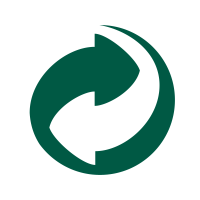

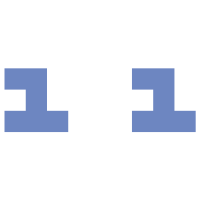

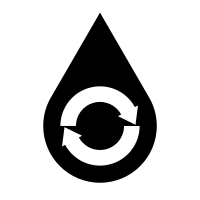

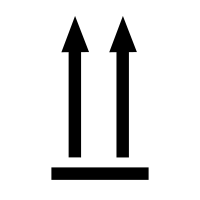

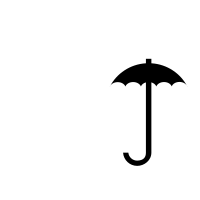

In [8]:
filtered_svgs = filter_by_nbgroups_maxlengroup_and_nbcommands(worldlogo[worldlogo.TextArea<=0.3], number_groups=8, max_len_groups = 30, number_commands = 50)
print(len(filtered_svgs))
show_svgs(filtered_svgs, limit = 5)

8590


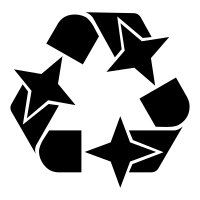

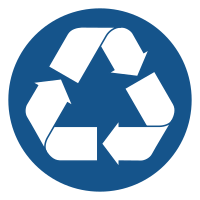

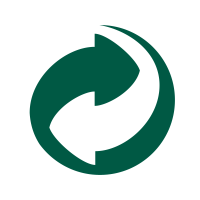

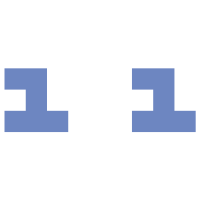

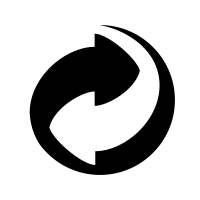

In [9]:
filtered_svgs = filter_by_nbgroups_maxlengroup_and_nbcommands(worldlogo[worldlogo.Text == False], number_groups=16, max_len_groups = 62, number_commands = 128)
print(len(filtered_svgs))
show_svgs(filtered_svgs, limit = 5)

15193


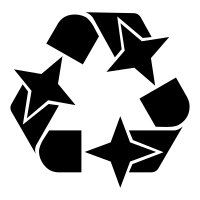

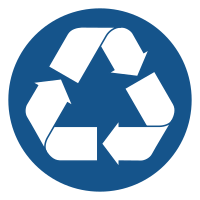

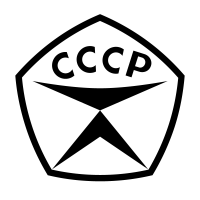

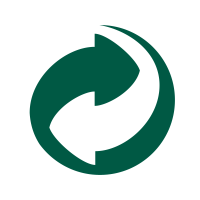

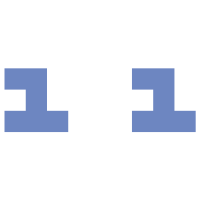

In [10]:
filtered_svgs = filter_by_nbgroups_maxlengroup_and_nbcommands(worldlogo[worldlogo.TextArea <= 0.1], number_groups=16, max_len_groups = 62, number_commands = 128)
print(len(filtered_svgs))
show_svgs(filtered_svgs, limit = 5)

### SVG_Logo Analysis

In [11]:
SVGLogo_meta = pd.read_csv(os.path.join(datafolder, "data_for_training_deepsvg_model/SVGLogo_meta/meta_32314.csv"))
SVG_Logo_folder = os.path.join(datafolder, "SVGs_transforms_removed/SVGLogo_no_transforms_filtered")
SVGLogo_meta

,id,total_len,nb_groups,len_groups,max_len_group
0,%C3%98len%20Betong%20logo,160,19,"[10, 13, 7, 10, 4, 9, 9, 7, 13, 14, 14, 6, 6, ...",14
1,%C3%96sterreichische%20Kuvertindustrie%20logo,57,9,"[8, 8, 10, 12, 5, 3, 3, 3, 5]",12
2,%C3%86ON-Logo,130,7,"[43, 43, 7, 11, 10, 7, 9]",43
3,!noob oy,85,9,"[7, 8, 6, 6, 16, 14, 13, 10, 5]",16
4,%C3%96sterreichischen%20Katholischen%20Bibelwe...,35,3,"[12, 13, 10]",13
...,...,...,...,...,...
32309,zzzz,27,4,"[15, 4, 4, 4]",15
32310,zulily,94,6,"[59, 6, 6, 4, 13, 6]",59
32311,zzz maintenance services,136,7,"[22, 22, 20, 20, 20, 20, 12]",22
32312,örebro kommun,154,4,"[13, 13, 40, 88]",88


5814


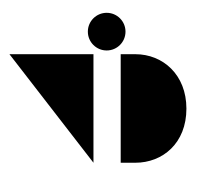

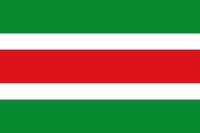

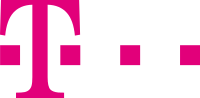

In [21]:
filtered_svgs = filter_by_nbgroups_maxlengroup_and_nbcommands(SVGLogo_meta, number_groups=8, max_len_groups = 30, number_commands = 50, folder_path= SVG_Logo_folder)
print(len(filtered_svgs))
show_svgs(filtered_svgs,  limit = 22)

### WorldVector_SVGLogo DeepSVG Outlines Analysis

In [23]:
combined_meta = pd.read_csv(os.path.join(datafolder, "data_for_training_deepsvg_model/WorldVector_SVGLogo_preprocessed_filtered_combined_meta/meta_91788.csv"))
combined_meta

,id,total_len,nb_groups,len_groups,max_len_group
0,- the box company -,50,4,"[17, 19, 7, 7]",19
1,'agromash holding,51,7,"[4, 7, 15, 6, 8, 6, 5]",15
2,%CE%9Fnassis%20Stegi%20Logo%20%282019%29,127,14,"[5, 12, 12, 12, 11, 9, 5, 5, 4, 13, 12, 9, 13, 5]",13
3,01%20ck%20logo%20RGB,155,12,"[12, 54, 10, 12, 12, 10, 11, 12, 6, 6, 5, 5]",54
4,011-sign,121,10,"[13, 9, 9, 9, 9, 27, 17, 10, 9, 9]",27
...,...,...,...,...,...
91783,zuidplas,100,14,"[11, 10, 7, 6, 6, 6, 9, 9, 6, 6, 6, 6, 6, 6]",11
91784,zz creative,68,9,"[11, 5, 11, 10, 8, 7, 5, 4, 7]",11
91785,ZZMetro%20Line%205,169,15,"[7, 40, 22, 6, 5, 5, 17, 16, 6, 5, 7, 14, 8, 5...",40
91786,zydacron,112,12,"[13, 11, 7, 12, 9, 15, 14, 5, 9, 6, 7, 4]",15


12690


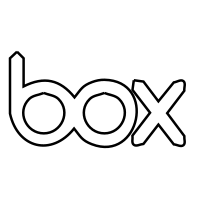

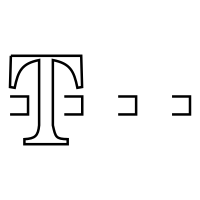

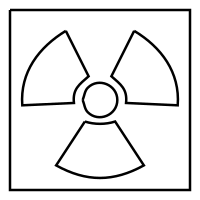

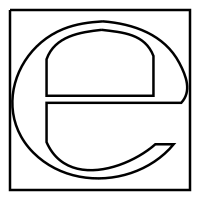

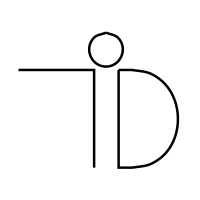

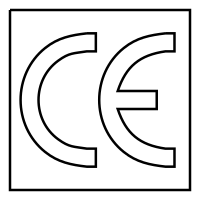

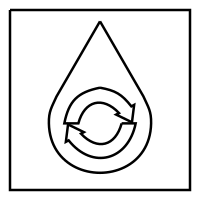

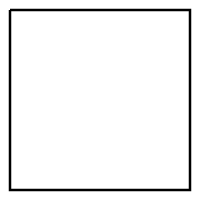

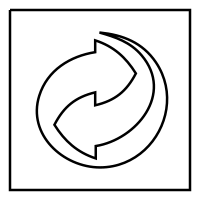

In [26]:
filtered_svgs = filter_by_nbgroups_maxlengroup_and_nbcommands(combined_meta, number_groups=8, max_len_groups = 30, number_commands = 50, folder_path=os.path.join(datafolder, "data_for_training_deepsvg_model/WorldVector_SVGLogo_preprocessed_filtered_combined"))
print(len(filtered_svgs))
show_svgs(filtered_svgs, limit=15)